In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

In [2]:
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
dataset = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = dataset.load_data()

In [4]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## Normalization

In [5]:
X_train, X_test = X_train / 225.0, X_test / 225.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: '' is not a valid value for color

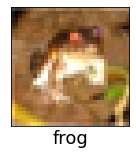

In [7]:
def show_img(X, y):
    plt.figure(figsize=(20, 5))
    for i in range(16):
        plt.subplot(2, 8, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[y[i][0]], fontsize='18',color='' )
    plt.show()
show_img(X_train, y_train)

## Building model

In [8]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                7

In [10]:
#loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimal = keras.optimizers.Adam(lr=0.001)
metrics = ['accuracy']
model.compile(loss=loss, optimizer=optimal, metrics=metrics)

In [11]:
batch_size = 64
epochs = 5
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

KeyboardInterrupt: 

In [12]:
model.save('../Models/classification.h5')

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
load_model = keras.models.load_model('../Models/classification.h5')

In [14]:
y_pred = load_model.predict(X_test[:16])

1/1 [==============================] - 0s 309ms/step


In [15]:
y_pred = y_pred.argmax(axis=1, keepdims=True)

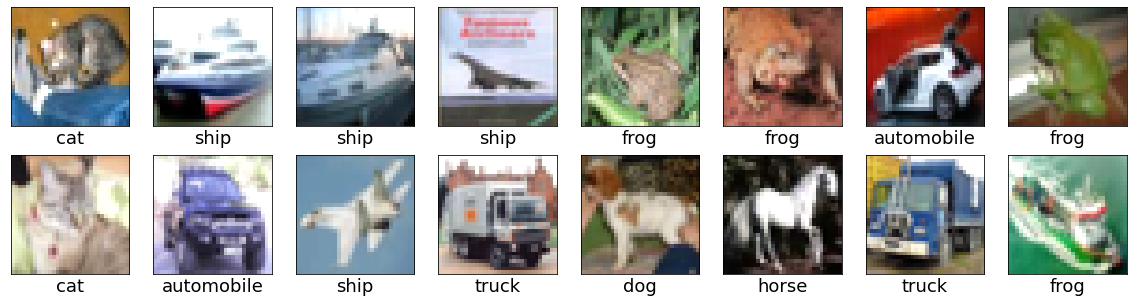

In [32]:
show_img(X_test, y_pred)